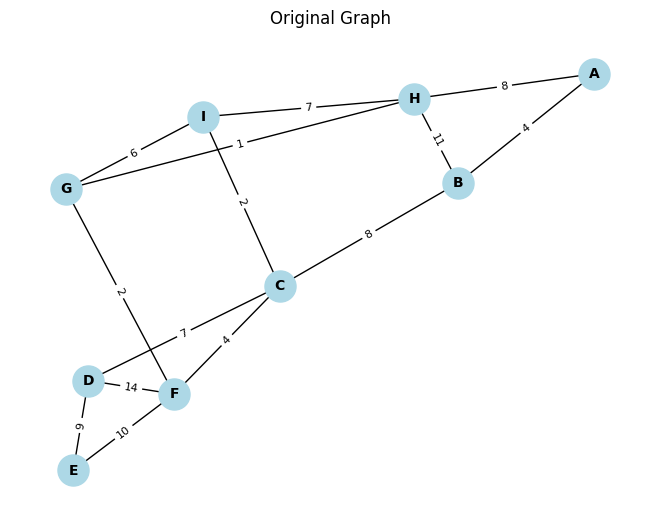

Prim's Algorithm MST: [('A', 'B', 4), ('B', 'C', 8), ('C', 'I', 2), ('C', 'F', 4), ('F', 'G', 2), ('G', 'H', 1), ('C', 'D', 7), ('D', 'E', 9)]
Total Cost: 37
Kruskal's Algorithm MST: [('G', 'H', 1), ('C', 'I', 2), ('F', 'G', 2), ('A', 'B', 4), ('C', 'F', 4), ('C', 'D', 7), ('A', 'H', 8), ('D', 'E', 9)]
Total Cost: 37


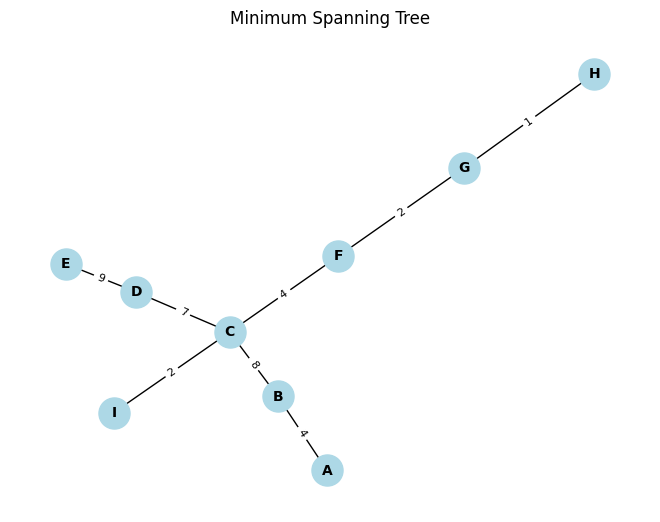

In [2]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt

class MinimumSpanningTree:
    def __init__(self, graph):
        """
        Initializes the MST solver with the given graph.
        :param graph: A dictionary representing the graph where keys are nodes
                      and values are lists of tuples (neighbor, weight).
        """
        self.graph = graph
        self.nodes = list(graph.keys())

    def prim(self, start_node):
        """
        Implements Prim's algorithm to find the MST.
        :param start_node: The starting node for Prim's algorithm.
        :return: The MST as a list of edges and its total cost.
        """
        visited = set()
        min_heap = [(0, start_node, None)]  # (weight, current_node, parent)
        mst_edges = []
        total_cost = 0

        while min_heap:
            weight, current, parent = heapq.heappop(min_heap)

            if current not in visited:
                visited.add(current)
                total_cost += weight
                if parent is not None:
                    mst_edges.append((parent, current, weight))

                for neighbor, edge_weight in self.graph[current]:
                    if neighbor not in visited:
                        heapq.heappush(min_heap, (edge_weight, neighbor, current))

        return mst_edges, total_cost

    def kruskal(self):
        """
        Implements Kruskal's algorithm to find the MST.
        :return: The MST as a list of edges and its total cost.
        """
        edges = []
        for node, neighbors in self.graph.items():
            for neighbor, weight in neighbors:
                if (weight, neighbor, node) not in edges:  # Avoid duplicate edges
                    edges.append((weight, node, neighbor))

        edges.sort()  # Sort edges by weight
        parent = {node: node for node in self.nodes}

        def find(node):
            if parent[node] != node:
                parent[node] = find(parent[node])
            return parent[node]

        def union(node1, node2):
            root1, root2 = find(node1), find(node2)
            if root1 != root2:
                parent[root2] = root1

        mst_edges = []
        total_cost = 0

        for weight, u, v in edges:
            if find(u) != find(v):
                union(u, v)
                mst_edges.append((u, v, weight))
                total_cost += weight

        return mst_edges, total_cost

    def visualize(self, mst_edges=None):
        """
        Visualizes the graph or MST using matplotlib and networkx.
        :param mst_edges: A list of edges in the MST, or None to visualize the original graph.
        """
        g = nx.Graph()

        if mst_edges:
            for u, v, weight in mst_edges:
                g.add_edge(u, v, weight=weight)
            title = "Minimum Spanning Tree"
        else:
            for node, neighbors in self.graph.items():
                for neighbor, weight in neighbors:
                    g.add_edge(node, neighbor, weight=weight)
            title = "Original Graph"

        pos = nx.spring_layout(g)
        labels = nx.get_edge_attributes(g, 'weight')

        nx.draw(g, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10, font_weight='bold')
        nx.draw_networkx_edge_labels(g, pos, edge_labels=labels, font_size=8)
        plt.title(title)
        plt.show()

# Example graph (data centers and cable lengths)
example_graph = {
    'A': [('B', 4), ('H', 8)],
    'B': [('A', 4), ('C', 8), ('H', 11)],
    'C': [('B', 8), ('D', 7), ('F', 4), ('I', 2)],
    'D': [('C', 7), ('E', 9), ('F', 14)],
    'E': [('D', 9), ('F', 10)],
    'F': [('C', 4), ('D', 14), ('E', 10), ('G', 2)],
    'G': [('F', 2), ('H', 1), ('I', 6)],
    'H': [('A', 8), ('B', 11), ('G', 1), ('I', 7)],
    'I': [('C', 2), ('G', 6), ('H', 7)]
}

# Instantiate the MST solver
mst_solver = MinimumSpanningTree(example_graph)

# Visualize the original graph
mst_solver.visualize()

# Compute MST using Prim's algorithm
prim_edges, prim_cost = mst_solver.prim(start_node='A')
print("Prim's Algorithm MST:", prim_edges)
print("Total Cost:", prim_cost)

# Compute MST using Kruskal's algorithm
kruskal_edges, kruskal_cost = mst_solver.kruskal()
print("Kruskal's Algorithm MST:", kruskal_edges)
print("Total Cost:", kruskal_cost)

# Visualize the MST (choose one)
mst_solver.visualize(prim_edges)
